In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Crystal surface dimensions
width_x = 6.0  # mm
height_y = 2.0  # mm
step = 0.01  # mm = 100 micrometers

# Critical angle
theta_c = 10  # µrad
torsion_x_0 = -35.0  # µrad/mm base torsion
torsion_x_upper = 15.0  # µrad/mm for y > center
torsion_x_lower = 25.0  # µrad/mm for y < center
torsion_y = 62.0        # µrad/mm
theta_0 = 0.0           # µrad

#correlation of the angle of the impacting particle with the position

dangle_impacting_particles_per_dy = 7.5 #murad/mm


# Incoming beam angle
def theta_beam(y):
    return dangle_impacting_particles_per_dy * y  # µrad/mm

def get_angle_wrt_crystal_plane(
    torsion_x_0,
    torsion_x_upper, 
    torsion_x_lower,
    torsion_y,
    theta_0
    ):
      
    
    
    # Create mesh grid
    x_vals = np.arange(0, width_x + step, step)
    y_vals = np.arange(0, height_y + step, step)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Coordinates relative to center
    x_rel = X - width_x / 2
    y_rel = Y - height_y / 2

    # Asymmetric torsion modifier
    torsion_modifier = np.where(
        y_rel >= 0,
        torsion_x_upper * y_rel,
        torsion_x_lower * y_rel
    )

    # Local crystal plane orientation
    theta_planes = theta_0 + (torsion_x_0 + torsion_modifier) * x_rel + torsion_y * y_rel
    
#     theta_planes = theta_0 + (torsion_x_0 + torsion_modifier) * x_rel + torsion_y * y_rel + torsion_x * x_rel
    

    # Beam angle
    theta_beam_vals = theta_beam(Y)

    # Difference between beam and plane
    delta_theta = theta_beam_vals - theta_planes

    # Plot: Difference with centered colormap (white at zero)
    fig, ax = plt.subplots(figsize=(12, 4))
    norm = TwoSlopeNorm(vmin=np.min(delta_theta), vcenter=0, vmax=np.max(delta_theta))
    c = ax.pcolormesh(X, Y, delta_theta, shading='auto', cmap='seismic', norm=norm)

    # Iso-lines for ±θc and 0
    contours = ax.contour(X, Y, delta_theta, levels=[-theta_c, 0, theta_c], colors='k', linestyles=['--', '-', '--'])
    ax.clabel(contours, fmt={-theta_c: '-θc', 0: '0', theta_c: '+θc'}, inline=True, fontsize=8)

    # Labels and layout
    fig.colorbar(c, ax=ax, label='Beam – Plane Angle Difference (µrad)')
    ax.set_title('Angle Difference: Beam vs. Crystal Plane')
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    plt.tight_layout()
    plt.show()

    
    
    # Plot: Difference with centered colormap (white at zero)
    fig, ax = plt.subplots(figsize=(12, 4))
    norm = TwoSlopeNorm(vmin=np.min(delta_theta), vcenter=0, vmax=np.max(delta_theta))
    c = ax.pcolormesh(X, Y, delta_theta, shading='auto', cmap='seismic', norm=norm)

    # Iso-lines for ±θc and 0
#     contours = ax.contour(X, Y, delta_theta, levels=[-theta_c, 0, theta_c], colors='k', linestyles=['--', '-', '--'])
    ax.clabel(contours, fmt={-theta_c: '-θc', 0: '0', theta_c: '+θc'}, inline=True, fontsize=8)

    # Labels and layout
    fig.colorbar(c, ax=ax, label='Crystal Plane (µrad)')
    ax.set_title('Crystal Plane')
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    plt.tight_layout()
    plt.show()   

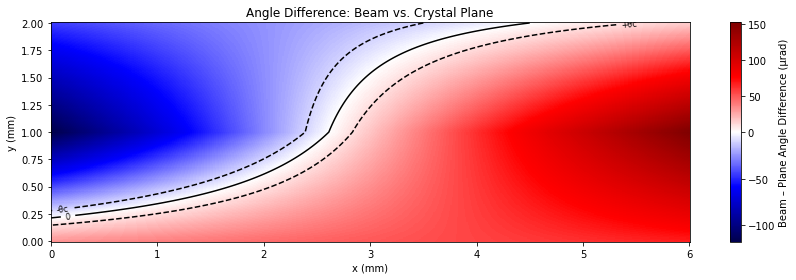

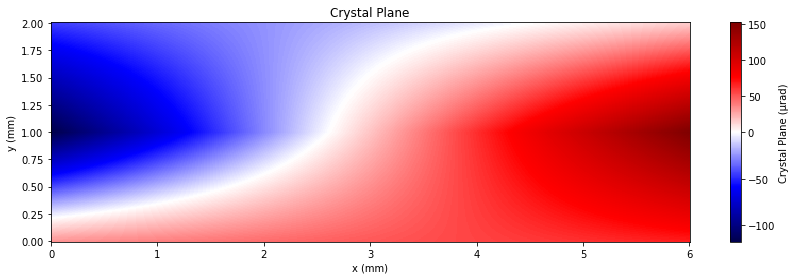

In [18]:


get_angle_wrt_crystal_plane(
    torsion_x_0      = -45.0,
    torsion_x_upper  =  35.0 , 
    torsion_x_lower  =  -39.0 ,
    torsion_y        =  40.0 ,
    theta_0          = -10.0
    )



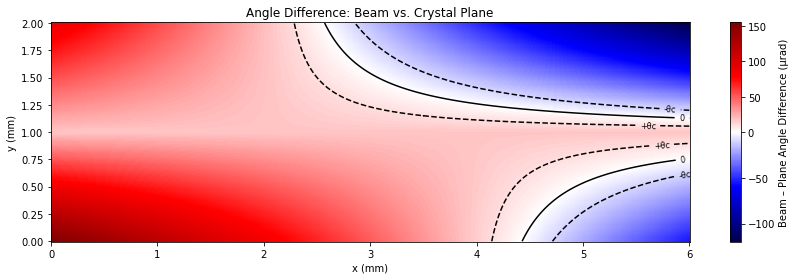

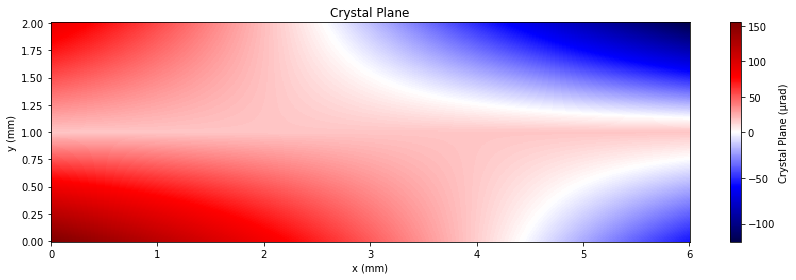

In [19]:


get_angle_wrt_crystal_plane(
    torsion_x_0     = 0,
    torsion_x_upper  =  35.0 , 
    torsion_x_lower  =  -35.0 ,
    torsion_y        =  40.0 ,
    theta_0          = -10.0
    )



In [20]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Crystal surface dimensions
width_x = 6.0  # mm
height_y = 2.0  # mm
step = 0.01  # mm = 100 micrometers

# Critical angle
theta_c = 10  # µrad
torsion_x_0 = -35.0  # µrad/mm base torsion
torsion_x_upper = 15.0  # µrad/mm for y > center
torsion_x_lower = 25.0  # µrad/mm for y < center
torsion_y = 62.0        # µrad/mm
theta_0 = 0.0           # µrad

#correlation of the angle of the impacting particle with the position

dangle_impacting_particles_per_dy = 7.5 #murad/mm


# Incoming beam angle
def theta_beam(y):
    return dangle_impacting_particles_per_dy * y  # µrad/mm

def get_angle_wrt_crystal_plane(
    theta_0,a1=0,a2=0,a3=0,a4=0,a5=0,a6=0,a7=0,a8=0,a9=0,a10=0
    ):
      
    
    
    # Create mesh grid
    x_vals = np.arange(0, width_x + step, step)
    y_vals = np.arange(0, height_y + step, step)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Coordinates relative to center
    x_rel = X - width_x / 2
    y_rel = Y - height_y / 2

    # Asymmetric torsion modifier
#     torsion_modifier = np.where(
#         y_rel >= 0,
#         torsion_x_upper * y_rel,
#         torsion_x_lower * y_rel
#     )

    # Local crystal plane orientation
#     theta_planes = theta_0 + (torsion_x_0 + torsion_modifier) * x_rel + torsion_y * y_rel
    
#     theta_planes = theta_0 + torsion_xy * x_rel * abs(y_rel)**2 + torsion_y * y_rel + torsion_x * x_rel
    theta_planes = (
    theta_0
    + a1 * x_rel
    + a2 * y_rel
    + a3 * x_rel**2
    + a4 * y_rel**2
    + a5 * x_rel * y_rel
    + a6 * x_rel * np.abs(y_rel)
    + a7 * y_rel * np.abs(x_rel)
    + a8 * np.abs(x_rel)
    + a9 * np.abs(y_rel)
    + a10 * np.abs(x_rel) * np.abs(y_rel)
    )

    # Beam angle
    theta_beam_vals = theta_beam(Y)

    # Difference between beam and plane
    delta_theta = theta_beam_vals - theta_planes

    # Plot: Difference with centered colormap (white at zero)
    fig, ax = plt.subplots(figsize=(12, 4))
    norm = TwoSlopeNorm(vmin=np.min(delta_theta), vcenter=0, vmax=np.max(delta_theta))
    c = ax.pcolormesh(X, Y, delta_theta, shading='auto', cmap='seismic', norm=norm)

    # Iso-lines for ±θc and 0
    contours = ax.contour(X, Y, delta_theta, levels=[-theta_c, 0, theta_c], colors='k', linestyles=['--', '-', '--'])
    ax.clabel(contours, fmt={-theta_c: '-θc', 0: '0', theta_c: '+θc'}, inline=True, fontsize=8)

    # Labels and layout
    fig.colorbar(c, ax=ax, label='Beam – Plane Angle Difference (µrad)')
    ax.set_title('Angle Difference: Beam vs. Crystal Plane')
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    plt.tight_layout()
    plt.show()

    
    
    # Plot: Difference with centered colormap (white at zero)
    fig, ax = plt.subplots(figsize=(12, 4))
    norm = TwoSlopeNorm(vmin=np.min(delta_theta), vcenter=0, vmax=np.max(delta_theta))
    c = ax.pcolormesh(X, Y, delta_theta, shading='auto', cmap='seismic', norm=norm)

    # Iso-lines for ±θc and 0
#     contours = ax.contour(X, Y, delta_theta, levels=[-theta_c, 0, theta_c], colors='k', linestyles=['--', '-', '--'])
    ax.clabel(contours, fmt={-theta_c: '-θc', 0: '0', theta_c: '+θc'}, inline=True, fontsize=8)

    # Labels and layout
    fig.colorbar(c, ax=ax, label='Crystal Plane (µrad)')
    ax.set_title('Crystal Plane')
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    plt.tight_layout()
    plt.show()    



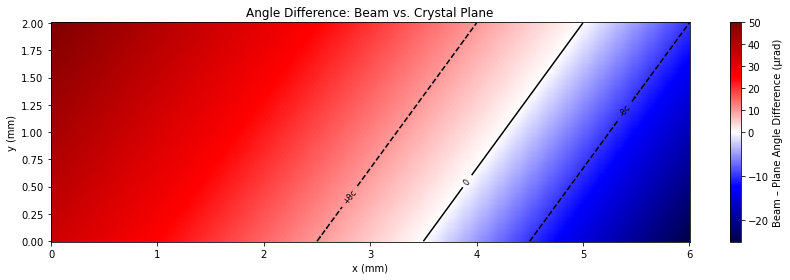

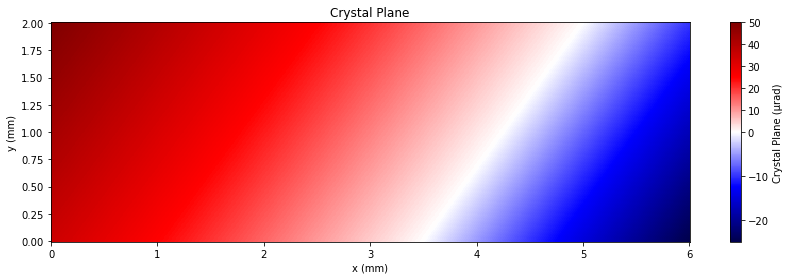

In [21]:
get_angle_wrt_crystal_plane(
        theta_0 = -5,
        a1 = 10,
    )